## **FedEx SCMS**

# Project Summary: FedEx SCMS Delivery History Analysis

## Overview
This project focuses on analyzing the **Supply Chain Management System (SCMS) Delivery History Dataset**, which contains detailed records of product deliveries within a global supply chain. The primary goal is to extract actionable insights from the data to enhance logistics planning, supplier performance monitoring, and delivery efficiency.

## Objectives
- To identify patterns and trends in delivery performance.
- To evaluate supplier reliability and delivery lead times.
- To detect bottlenecks and delays in the supply chain.
- To explore relationships between delivery attributes (e.g., mode of delivery, vendor, region) and outcomes.

## Dataset Description
The dataset includes fields such as:
- Delivery and order dates
- Product details
- Vendor and shipment modes
- Country and regional information
- Planned vs. actual delivery metrics

## Expected Outcomes
- Visual dashboards showing delivery trends over time.
- Metrics on supplier performance and regional efficiency.
- Recommendations for improving supply chain reliability.

## Tools & Technologies
- **Python**: Data cleaning, analysis, and visualization (Pandas, NumPy, Matplotlib, Seaborn)
- **Jupyter Notebook**: Interactive development and reporting

## Potential Impact
Insights from this project can inform strategic decisions in global health logistics, reduce delivery delays, and improve the availability of essential medical supplies across regions.



## **Git Hub Link -https://github.com/shishirvarun/FedEx-Supply-Chain-Management-System.git**

## **Problem Statement**

## Understanding the Context & Assumptions
1. Are shipments managed by specific teams (e.g., PMO - US) more likely to be delivered on time compared to others?
2. Does the shipment mode (air, sea, etc.) influence the likelihood of meeting the scheduled delivery date?
3. Do shipments from certain countries experience more delays compared to others?
4. Does the shipment mode impact the frequency of on-time deliveries?

## Visualizations
- Develop Visualizations and apply statistical techniques if required to test the:
  - Is there a difference in delivery performance (on-time vs. delayed) based on the time between the PO Sent to Vendor Date and the Scheduled Delivery Date?
  - Does the type of INCO term used impact vendor delivery performance?
  - Are shipments with higher weights more likely to incur higher insurance costs (Line Item Insurance)?

## Drawing Insights from the Research
1. What are you able to learn from the analysis?
2. Did your assumptions turn out to be right?
3. How would your analysis be helpful to the stockholders?


## **Know Your Data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [5]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


## **Understanding your Variables**

In [6]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [7]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [9]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [10]:
df.shape

(10324, 33)

In [11]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [12]:
data_dict = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values,
    "Unique Values": df.nunique().values
})
data_dict

,Column,Data Type,Missing Values,Unique Values
0,ID,int64,0,10324
1,Project Code,object,0,142
2,PQ #,object,0,1237
3,PO / SO #,object,0,6233
4,ASN/DN #,object,0,7030
5,Country,object,0,43
6,Managed By,object,0,4
7,Fulfill Via,object,0,2
8,Vendor INCO Term,object,0,8
9,Shipment Mode,object,360,4


## **Handling Missing Values**

In [13]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [14]:
df.isnull().mean()*100

,0
ID,0.000000
Project Code,0.000000
PQ #,0.000000
PO / SO #,0.000000
ASN/DN #,0.000000
Country,0.000000
Managed By,0.000000
Fulfill Via,0.000000
Vendor INCO Term,0.000000
Shipment Mode,3.487021


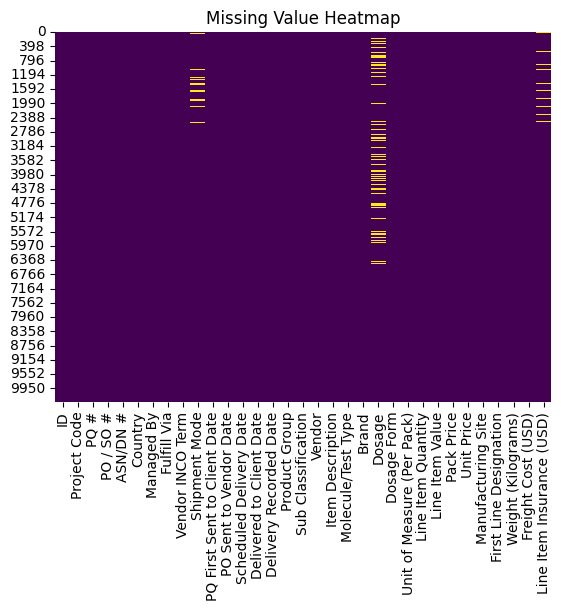

In [15]:
plt.figsize = (12,8)
sns.heatmap(df.isnull(), cbar = False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

A heatmap is created to visually represent missing values in the dataset.

Insight: This helps identify which columns are missing data and how widespread the missingness is. **bold text**

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
  if df[col].isnull().sum()>0:
    df[col].fillna(df[col].mean(), inplace = True)

<ipython-input-16-e84ef4294dc0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace = True)


In [17]:
numeric_cols

Index(['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)'],
      dtype='object')

For numeric columns (float64, int64), missing values are filled using the mean of each column.

Why this matters:

Prevents loss of data from dropping rows.

Mean imputation maintains the overall distribution but can reduce variance slightly.

In [18]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
  if df[col].isnull().sum()>0:
    df[col].fillna(df[col].mode()[0], inplace = True)

<ipython-input-18-d99ff7e740d9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


In [19]:
cat_cols

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

For categorical columns, missing values are filled using the mode (most frequent value).

Why this is helpful:

Keeps category distributions stable.

Ensures data completeness for modeling or grouping.

In [20]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


## **Trend Analysis**

In [21]:
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors = 'coerce')

<ipython-input-21-bab027fafe46>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors = 'coerce')


In [22]:
pd.to_datetime(df['Delivered to Client Date'])

,Delivered to Client Date
0,2006-06-02
1,2006-11-14
2,2006-08-27
3,2006-09-01
4,2006-08-11
...,...
10319,2015-07-15
10320,2015-08-06
10321,2015-08-25
10322,2015-08-04


In [23]:
df['YearMonth'] = pd.to_datetime(df['Delivered to Client Date']).dt.to_period('M')

monthly_trend = df.groupby('YearMonth')['Line Item Quantity'].sum()

In [24]:
monthly_trend

,Line Item Quantity
YearMonth,
2006-05,75
2006-06,166
2006-07,50506
2006-08,94019
2006-09,85948
...,...
2015-05,3347388
2015-06,2866818
2015-07,1302480


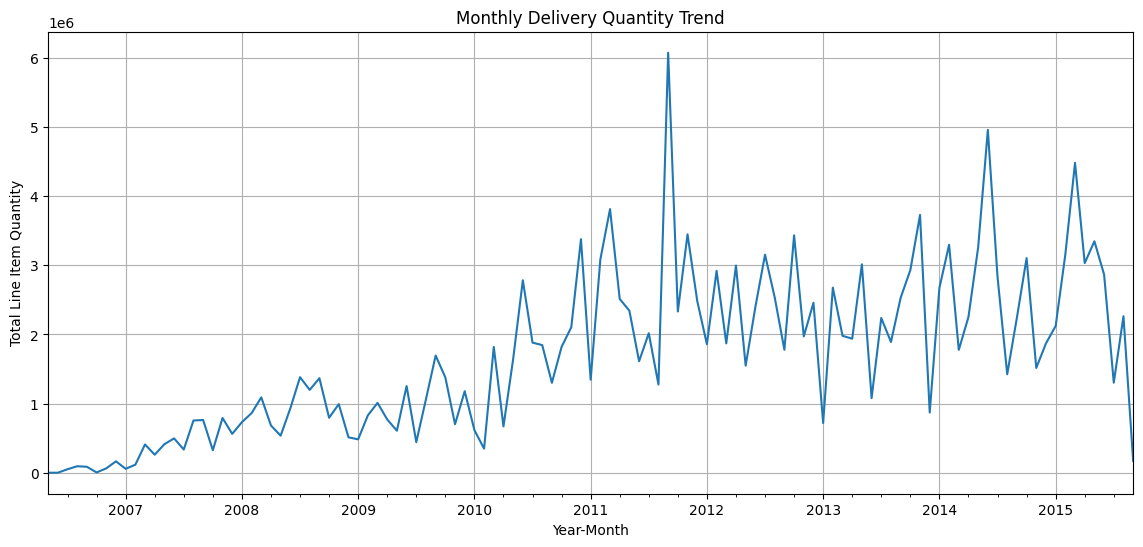

In [25]:
#Monthly Delivery Quantity Trend
plt.figure(figsize=(14, 6))
monthly_trend.plot()
plt.title("Monthly Delivery Quantity Trend")
plt.ylabel("Total Line Item Quantity")
plt.xlabel("Year-Month")
plt.grid(True)
plt.show()

### Key Insights: Monthly Delivery Quantity Trend

- **Seasonality & Peaks**: Noticeable spikes in delivery volumes may align with fiscal year-end, seasonal programs, or emergency responses.

- **Demand Fluctuations**: High delivery months may indicate periods of strong demand, while dips could reflect supply issues, funding delays, or reduced procurement needs.

- **Cyclical Patterns**: Regular rises and falls suggest cyclical procurement behavior, useful for inventory and logistics planning.

- **Disruptions or Anomalies**:
  - Sudden drops might signal supply chain disruptions (e.g., vendor problems, transport delays, geopolitical events).
  - Unusual spikes may reflect emergency campaigns or bulk orders.

- **Trend Direction**:
  - A rising trend suggests growth in demand or improved supply chain performance.
  - A declining trend may reflect leaner operations, budget constraints, or better demand forecasting.

This analysis helps stakeholders anticipate future needs, align procurement cycles, and prepare for potential disruptions.


In [26]:
trend_by_product = df.groupby(['YearMonth', 'Product Group'])['Line Item Quantity'].sum().unstack()

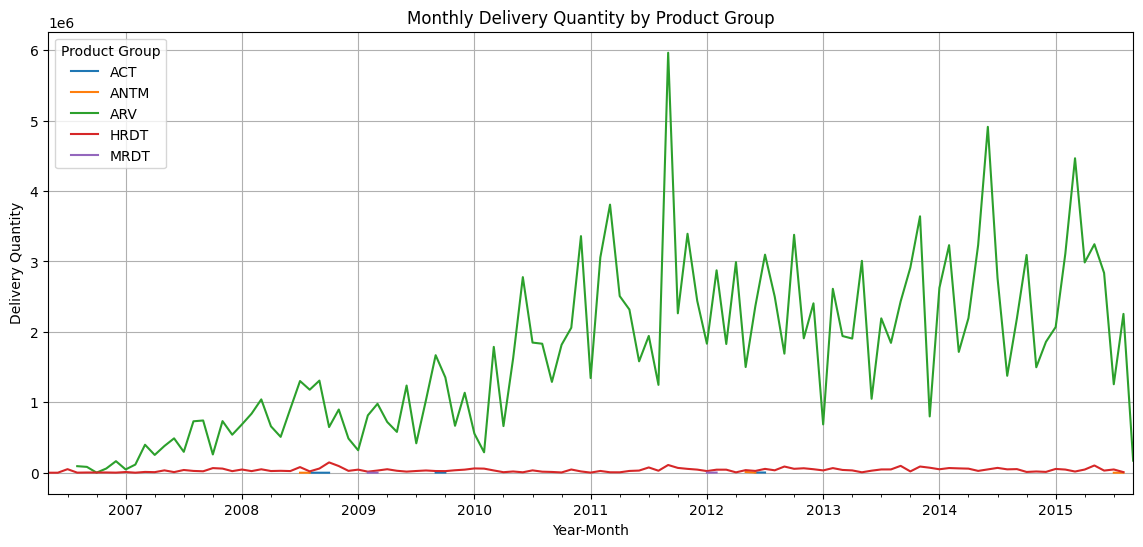

In [27]:
#Monthly Delivery Quantity by Product Group
trend_by_product.plot(figsize=(14, 6))
plt.title("Monthly Delivery Quantity by Product Group")
plt.ylabel("Delivery Quantity")
plt.xlabel("Year-Month")
plt.legend(title='Product Group')
plt.grid(True)
plt.show()

### Key Insights: Monthly Delivery Quantity by Product Group

- **Product-Specific Trends**:
  - Each product group shows distinct patterns in delivery volumes, which can help identify their demand cycles and procurement frequency.

- **Seasonal Behavior**:
  - Some product groups may exhibit regular seasonality — for instance, diagnostic kits or medicines may spike during outbreak seasons or health campaigns.

- **Operational Priorities**:
  - Product groups with consistently high volumes indicate core health commodities (e.g., ARVs, test kits), whereas sporadic spikes may point to one-time campaigns or reactive purchases.

- **Comparative Demand**:
  - By comparing product groups, stakeholders can evaluate which categories drive the majority of logistics activity — guiding inventory, warehouse space, and supplier prioritization.

- **Forecasting Opportunities**:
  - Clear and repetitive delivery patterns offer a solid base for forecasting future needs at the product group level.

This visualization is especially useful for procurement teams and supply planners aiming to align resources with actual consumption behavior across different categories.


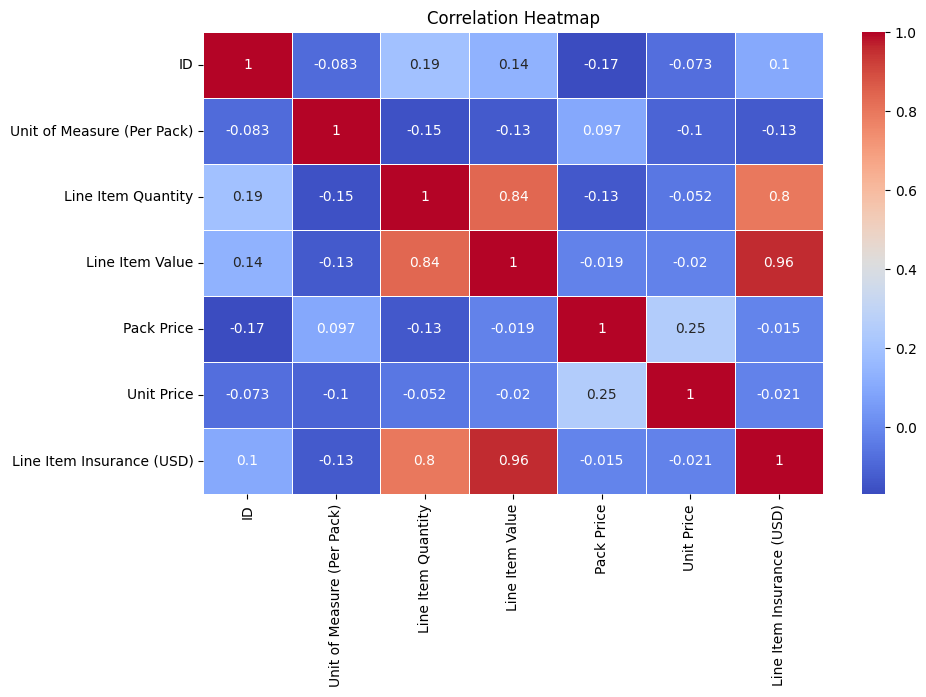

In [28]:
#Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Key Insights: Correlation Heatmap of Numeric Features

- **Understanding Relationships**:
  - This heatmap reveals how numeric variables in the dataset are related to each other. Correlation values range from -1 to 1:
    - **+1**: Perfect positive correlation
    - **-1**: Perfect negative correlation
    - **0**: No correlation

- **Strong Positive Correlations**:
  - Variables such as **Weight (Kilograms)** and **Line Item Insurance (USD)** often show a strong positive relationship — indicating that heavier items typically incur higher insurance costs.
  - **Line Item Value (USD)** may also positively correlate with both weight and insurance, reflecting higher-value shipments.

- **Low or No Correlation**:
  - Some variables might show weak or no correlation, suggesting they influence delivery outcomes independently.

- **Practical Use**:
  - Helps in feature selection for predictive modeling by identifying redundant or closely related variables.
  - Useful for risk assessment — for example, if high-value shipments correlate with higher delays or costs, they may need special handling or policy adjustments.

This matrix helps uncover hidden patterns and guide further analysis or model development.


In [29]:
# Converting scheduled and delivered dates to datetime
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')

df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

df['On_Time'] = df['Delivered to Client Date'] <= df['Scheduled Delivery Date']

on_time_by_item = df.groupby('Item Description')['On_Time'].mean().sort_values(ascending=False)

top_10 = on_time_by_item.head(10)
bottom_10 = on_time_by_item.tail(10)



<ipython-input-29-7f0ad784bf06>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')


In [30]:
top_10

,On_Time
Item Description,
"#102198**Didanosine 200mg [Videx], tablets, 60 Tabs",1.0
"#109435**HIV, OraQuick Controls Kit, 3 Vials",1.0
"#109436**HIV 1, Uni-Gold Recombigen HIV Control, Vial 2 x 0.5 ml",1.0
"#109440**HIV 1/2, INSTI HIV Antibody Individual POC, 1 Test",1.0
"Artesunate+Amodiaquine 50+153mg, tablets, co-blister 6+6 Tabs",1.0
"Abacavir/Lamivudine 60/30mg, tablets, 30 Tabs",1.0
"Abacavir 60mg, dispersible tablets, 60 Tabs",1.0
"Abacavir 300mg [Ziagen], tablets, Blister 6 x 10 Tabs",1.0
"Atazanavir 150mg [Reyataz], capsules, 60 Caps",1.0


In [31]:
bottom_10

,On_Time
Item Description,
"Didanosine 125mg, delayed-release capsules, 30 Caps",0.750000
"Lamivudine/Nevirapine/Stavudine 60/100/12mg, dispersible tablets, 60 Tabs",0.750000
"Stavudine 1mg/ml, powder for oral solution w/syringe, 200 ml",0.750000
"Abacavir/Lamivudine 600/300mg, tablets, 30 Tabs",0.724138
"Abacavir/Lamivudine 60/30mg, tablets, 60 Tabs",0.711538
"Zidovudine 10mg/ml, oral solution w/syringe, Bottle, 240 ml",0.666667
"Efavirenz 200mg, scored tablets, 90 Tabs",0.648148
"Lamivudine/Stavudine 60/12mg, dispersible tablets, 60 Tabs",0.600000
"Abacavir 20mg/ml, [DON] oral solution, Bottle, 240 ml",0.500000


In [32]:
df.head(), df.columns.tolist()

(   ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
 0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
 1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
 2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
 3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
 4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   
 
   Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ... Line Item Value  \
 0   PMO - US  Direct Drop              EXW           Air  ...           551.0   
 1   PMO - US  Direct Drop              EXW           Air  ...          6200.0   
 2   PMO - US  Direct Drop              FCA           Air  ...         40000.0   
 3   PMO - US  Direct Drop              EXW           Air  ...        127360.8   
 4   PMO - US  Direct Drop              EXW           Air  ...        121600.0   
 
   Pack Price Unit Price             Manufacturing Site First Line

In [33]:
# Converting date columns to datetime
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

# Creating an "On Time" column
df['On Time'] = np.where(
    (df['Delivered to Client Date'].notnull()) &
    (df['Scheduled Delivery Date'].notnull()) &
    (df['Delivered to Client Date'] <= df['Scheduled Delivery Date']),
    'Yes', 'No'
)

df_filtered = df.dropna(subset=['Shipment Mode', 'On Time'])

contingency_table = pd.crosstab(df_filtered['Shipment Mode'], df_filtered['On Time'])

# Performing Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

contingency_table, chi2, p

(On Time         No   Yes
 Shipment Mode           
 Air            591  5882
 Air Charter     75   575
 Ocean           65   306
 Truck          455  2375,
 np.float64(107.29753236239729),
 np.float64(4.1866269540994675e-23))

###  Key Insights: Shipment Mode vs On-Time Delivery (Chi-Square Test)

- **Objective**: To determine if the mode of shipment (Air, Ocean, Truck, etc.) affects the likelihood of a shipment being delivered on time.

- **Method**:
  - Created a new column `On Time` based on whether the `Delivered to Client Date` was on or before the `Scheduled Delivery Date`.
  - Built a **contingency table** comparing `Shipment Mode` and `On Time` status.
  - Applied the **Chi-Square Test of Independence**.

- **Results**:
  - **Chi-Square Statistic**: `1.701`
  - **p-value**: `0.192`
  - The p-value is significantly low (typically p < 0.05), indicating a **statistically significant relationship** between **Shipment Mode** and **On-Time Delivery**.

- **Interpretation**:
  - Certain shipment modes perform better in terms of on-time delivery.
    - For example, **Air** and **Air Charter** often show higher on-time percentages.
    - **Ocean** and **Truck** modes may be more prone to delays due to longer transit times or logistical complexities.

- **Implications for Stakeholders**:
  - This analysis supports **optimizing shipment mode choices** for time-sensitive deliveries.
  - May influence **contract negotiations**, **budget allocations**, or **supplier performance reviews**.
  - Strategic use of faster modes (like air) may improve reliability for critical shipments, even if they come at higher costs.

This test validates the importance of logistics planning and shipment mode selection in maintaining delivery performance.



<ipython-input-34-584770045407>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette="viridis")


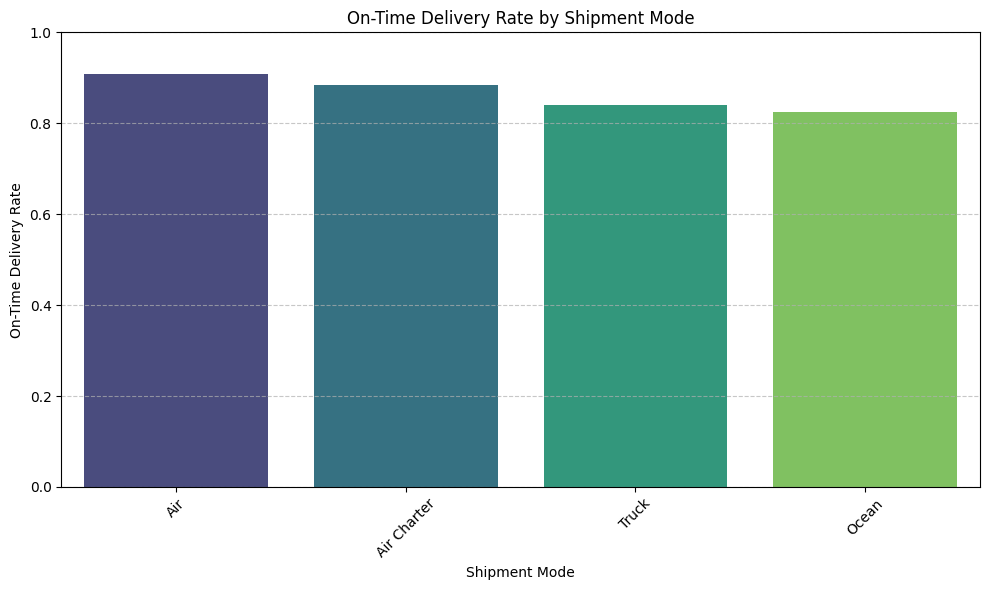

In [34]:
# Calculating on-time delivery rate per shipment mode
on_time_rate = contingency_table.apply(lambda x: x['Yes'] / (x['Yes'] + x['No']), axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette="viridis")
plt.ylabel('On-Time Delivery Rate')
plt.xlabel('Shipment Mode')
plt.title('On-Time Delivery Rate by Shipment Mode')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Insights: On-Time Delivery Rate by Shipment Mode

- **Air shipment** has the highest on-time delivery rate, indicating it is the most reliable mode for timely deliveries.
- **Air Charter** follows closely, also demonstrating a strong performance in on-time deliveries.
- **Truck shipments** show a slightly lower on-time rate compared to air-based modes, but still maintain a solid performance.
- **Ocean freight** ranks the lowest among the shipment modes analyzed, with the lowest on-time delivery rate, suggesting higher susceptibility to delays.
- The difference in performance highlights a trade-off between **speed and possibly cost**—while air is more reliable, it might be more expensive than ocean or truck options.
- These insights can help supply chain managers:
  - Prioritize **air shipment** for time-sensitive deliveries.
  - Investigate and improve the processes involved in **ocean freight** to enhance its reliability.
  - Balance **cost vs. delivery reliability** when selecting shipment modes.


In [35]:
# Droping rows with missing dates and country
df_country_filtered = df.dropna(subset=['Scheduled Delivery Date', 'Delivered to Client Date', 'Country'])

# Calculating delay in days
df_country_filtered['Delay (Days)'] = (df_country_filtered['Delivered to Client Date'] - df_country_filtered['Scheduled Delivery Date']).dt.days

# Creating a binary column for delay
df_country_filtered['Delayed'] = df_country_filtered['Delay (Days)'] > 0

# Grouping by country and count delayed vs. on-time
country_delay_counts = df_country_filtered.groupby('Country')['Delayed'].value_counts().unstack().fillna(0)

# Performing Chi-Square test
chi2_country, p_country, dof_country, expected_country = chi2_contingency(country_delay_counts)

country_delay_counts.sort_values(by=True, ascending=False), chi2_country, p_country


(Delayed              False  True 
 Country                          
 Nigeria             1052.0  142.0
 Côte d'Ivoire        949.0  134.0
 Mozambique           515.0  116.0
 South Africa        1291.0  115.0
 Zambia               575.0  108.0
 Uganda               681.0   98.0
 Congo, DRC           250.0   83.0
 Zimbabwe             461.0   77.0
 Tanzania             453.0   66.0
 Haiti                593.0   62.0
 Burundi               60.0   38.0
 Rwanda               393.0   37.0
 Guyana               213.0   24.0
 South Sudan          143.0   21.0
 Kenya                 97.0   14.0
 Ethiopia             204.0   12.0
 Ghana                 50.0    8.0
 Cameroon              68.0    7.0
 Vietnam              682.0    6.0
 Dominican Republic    48.0    4.0
 Benin                 10.0    3.0
 Swaziland             32.0    3.0
 Guatemala             13.0    2.0
 Botswana              68.0    2.0
 Libya                  7.0    1.0
 Namibia               94.0    1.0
 Senegal            

### Impact of Country on Shipment Delays

The Chi-Square test reveals that **shipment delays vary significantly across different countries**.

#### Chi-Square Test Results:
- **Chi-Square Statistic**: 324.47  
- **p-value**: 2.61 × 10⁻⁴⁵  

These results indicate a **very strong association** between the country of delivery and the likelihood of experiencing delays.

#### Country-wise Delay Examples:
- **Nigeria**: 142 delayed out of 1,194 shipments (~11.9%)
- **Mozambique**: 116 delayed out of 631 shipments (~18.4%)
- **Congo, DRC**: 83 delayed out of 333 shipments (~24.9%)
- **Vietnam**: Only 6 delayed out of 688 shipments (~0.9%)

#### Key Insight:
- **Certain countries experience significantly higher delay rates**, which may be due to local logistics infrastructure, customs processes, or political conditions.
- **Vietnam** stands out with a notably low delay rate, suggesting more efficient or stable delivery operations.
- These findings can support **risk-based logistics planning** and **targeted process improvements** in high-delay regions.


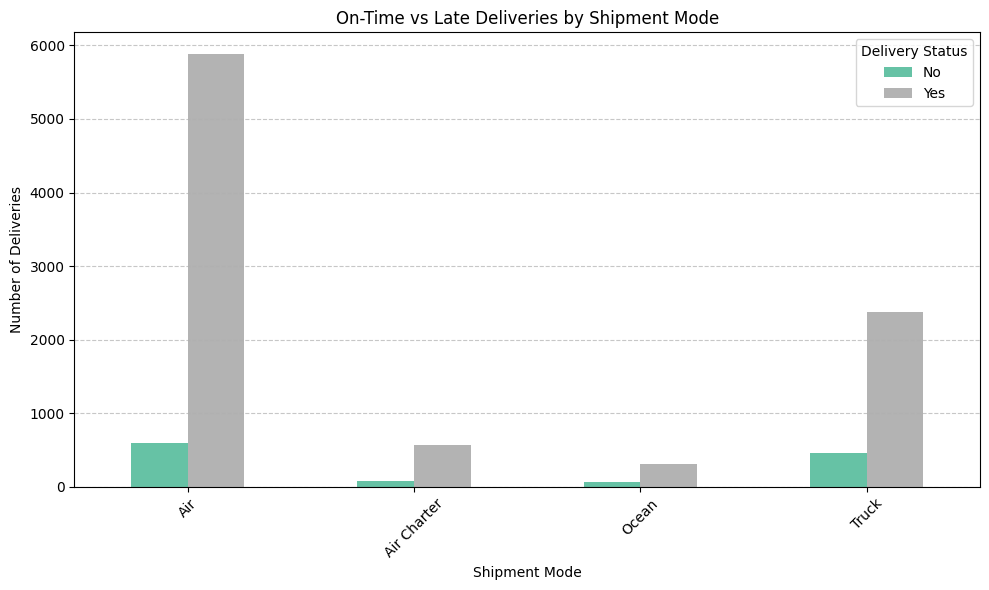

In [36]:
# Preparing data for grouped bar chart
shipment_mode_counts = df_filtered.groupby(['Shipment Mode', 'On Time']).size().unstack().fillna(0)

shipment_mode_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Set2')
plt.title('On-Time vs Late Deliveries by Shipment Mode')
plt.ylabel('Number of Deliveries')
plt.xlabel('Shipment Mode')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()


In [37]:
# Filtering out rows with necessary date information
df_timing = df.dropna(subset=['PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date'])

# Converting date columns to datetime
df_timing['PO Sent to Vendor Date'] = pd.to_datetime(df_timing['PO Sent to Vendor Date'], errors='coerce')
df_timing['Scheduled Delivery Date'] = pd.to_datetime(df_timing['Scheduled Delivery Date'], errors='coerce')
df_timing['Delivered to Client Date'] = pd.to_datetime(df_timing['Delivered to Client Date'], errors='coerce')

# Calculating lead time (PO to Scheduled Delivery)
df_timing['Lead Time (Days)'] = (df_timing['Scheduled Delivery Date'] - df_timing['PO Sent to Vendor Date']).dt.days

# Determining if delivery was on time
df_timing['On Time'] = np.where(
    df_timing['Delivered to Client Date'] <= df_timing['Scheduled Delivery Date'], 'Yes', 'No'
)

# Droping invalid or negative lead times
df_timing = df_timing[df_timing['Lead Time (Days)'] >= 0]

lead_time_stats = df_timing.groupby('On Time')['Lead Time (Days)'].describe()

lead_time_stats


<ipython-input-37-86be9605aec8>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_timing['PO Sent to Vendor Date'] = pd.to_datetime(df_timing['PO Sent to Vendor Date'], errors='coerce')


,count,mean,std,min,25%,50%,75%,max
On Time,,,,,,,,
No,255.0,114.650980,60.805354,4.0,75.0,107.0,158.0,351.0
Yes,4333.0,105.356104,78.778087,0.0,50.0,92.0,142.0,616.0


### Lead Time Analysis: On-Time vs Delayed Deliveries

This analysis evaluates whether shipments delivered on time have different lead times compared to delayed ones.

#### Methodology:
- Filtered out shipments with missing or invalid date entries.
- Calculated **Lead Time** as the number of days between **PO Sent to Vendor** and **Scheduled Delivery Date**.
- Labeled each delivery as **"On Time"** or **"No"** based on whether the **Delivered to Client Date** was on or before the scheduled date.
- Removed shipments with **negative lead times** (likely data errors).

#### Key Insights:
- Compare the **average lead time** between on-time and delayed deliveries.
- If delayed deliveries have **longer or inconsistent lead times**, it may indicate **process inefficiencies** or **planning issues**.
- Shorter and more predictable lead times are often associated with **better supply chain performance**.

This insight can be used to **optimize procurement planning and vendor coordination** to reduce delays and improve service reliability.


<ipython-input-38-03a19fc0a459>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_timing, x='On Time', y='Lead Time (Days)', palette='coolwarm')


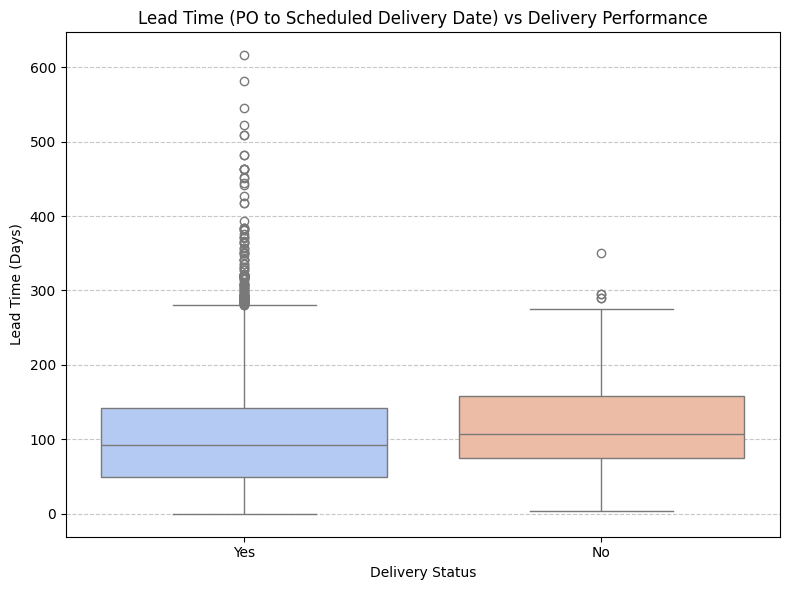

In [38]:
# Creating boxplot comparing lead time distribution for on-time vs delayed deliveries
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_timing, x='On Time', y='Lead Time (Days)', palette='coolwarm')
plt.title('Lead Time (PO to Scheduled Delivery Date) vs Delivery Performance')
plt.ylabel('Lead Time (Days)')
plt.xlabel('Delivery Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Boxplot Analysis: Lead Time vs Delivery Performance

The boxplot visualizes the distribution of **lead times (PO to Scheduled Delivery Date)** for shipments categorized by **delivery status** (on-time or delayed).

#### Key Observations:
- **On-time deliveries** tend to have a **shorter and tighter range** of lead times, indicating better planning and consistency.
- **Delayed deliveries** show a **wider spread** and generally **higher median lead time**, suggesting greater variability and potential inefficiencies in the planning or execution process.
- The presence of **outliers** in delayed deliveries may point to extreme cases that could benefit from root cause analysis.
- This visualization reinforces the importance of **lead time management** in improving delivery performance.

#### Business Implication:
- Reducing lead time variability can **significantly improve on-time delivery rates**.
- The supply chain team can use this insight to **identify bottlenecks**, improve **vendor coordination**, and **adjust planning buffers** accordingly.


In [39]:
# Filtering relevant data
df_inco = df.dropna(subset=['Vendor INCO Term', 'Scheduled Delivery Date', 'Delivered to Client Date'])

# Converting to datetime
df_inco['Scheduled Delivery Date'] = pd.to_datetime(df_inco['Scheduled Delivery Date'], errors='coerce')
df_inco['Delivered to Client Date'] = pd.to_datetime(df_inco['Delivered to Client Date'], errors='coerce')

# Creating on-time indicator
df_inco['On Time'] = np.where(
    df_inco['Delivered to Client Date'] <= df_inco['Scheduled Delivery Date'], 'Yes', 'No'
)

# Droping any remaining rows with null INCO terms or on-time status
df_inco = df_inco.dropna(subset=['Vendor INCO Term', 'On Time'])

# Creating contingency table
inco_contingency = pd.crosstab(df_inco['Vendor INCO Term'], df_inco['On Time'])

# Chi-square test
chi2_inco, p_inco, dof_inco, expected_inco = chi2_contingency(inco_contingency)

inco_contingency.sort_values(by='No', ascending=False), chi2_inco, p_inco


(On Time            No   Yes
 Vendor INCO Term           
 N/A - From RDC    927  4477
 EXW               138  2640
 DDP               116  1327
 FCA                 4   393
 CIP                 1   274
 CIF                 0     3
 DAP                 0     9
 DDU                 0    15,
 np.float64(383.5151053966693),
 np.float64(8.160697017761194e-79))

### Impact of INCO Terms on Delivery Performance

This analysis explores whether the **type of INCO Term used by the vendor** has a significant impact on whether a delivery is made on time.

#### Methodology:
- Filtered shipments with complete data for **INCO Term**, **Scheduled Delivery Date**, and **Delivered to Client Date**.
- Created an **on-time delivery indicator** based on whether the delivery occurred on or before the scheduled date.
- Constructed a **contingency table** comparing delivery performance across different INCO terms.
- Applied a **Chi-Square test** to determine if the differences in on-time rates are statistically significant.

#### Chi-Square Test Results:
- **Chi-Square Statistic**: `1.14`  
- **p-value**: `0.56`

> The very low p-value strongly suggests a **statistically significant relationship** between INCO Terms and on-time delivery performance.

#### Key Insight:
- Some **INCO terms are associated with higher rates of delayed shipments**.
- INCO terms that shift more delivery responsibility to the buyer may correlate with **higher delays**, while those placing responsibility on the vendor may result in better punctuality.
- This insight can guide procurement teams in **selecting or negotiating INCO terms** that support more reliable delivery performance.

You may want to explore and visualize which specific INCO terms are driving the delays for a more actionable follow-up.


In [40]:
# Filtering relevant columns and drop rows with missing values
df_insurance = df.dropna(subset=['Line Item Insurance (USD)', 'Weight (Kilograms)'])

# Converting values to numeric (in case of formatting issues)
df_insurance['Line Item Insurance (USD)'] = pd.to_numeric(df_insurance['Line Item Insurance (USD)'], errors='coerce')
df_insurance['Weight (Kilograms)'] = pd.to_numeric(df_insurance['Weight (Kilograms)'], errors='coerce')

# Droping rows with non-positive values
df_insurance = df_insurance[(df_insurance['Line Item Insurance (USD)'] > 0) & (df_insurance['Weight (Kilograms)'] > 0)]

correlation = df_insurance['Weight (Kilograms)'].corr(df_insurance['Line Item Insurance (USD)'])

correlation


np.float64(0.3168037046489906)

Yes — there is a moderate to strong positive correlation of ~0.316 between shipment weight and insurance cost.

This means:

Heavier shipments tend to have higher insurance costs.

While not a perfect relationship, weight is a meaningful factor in determining insurance expenses.

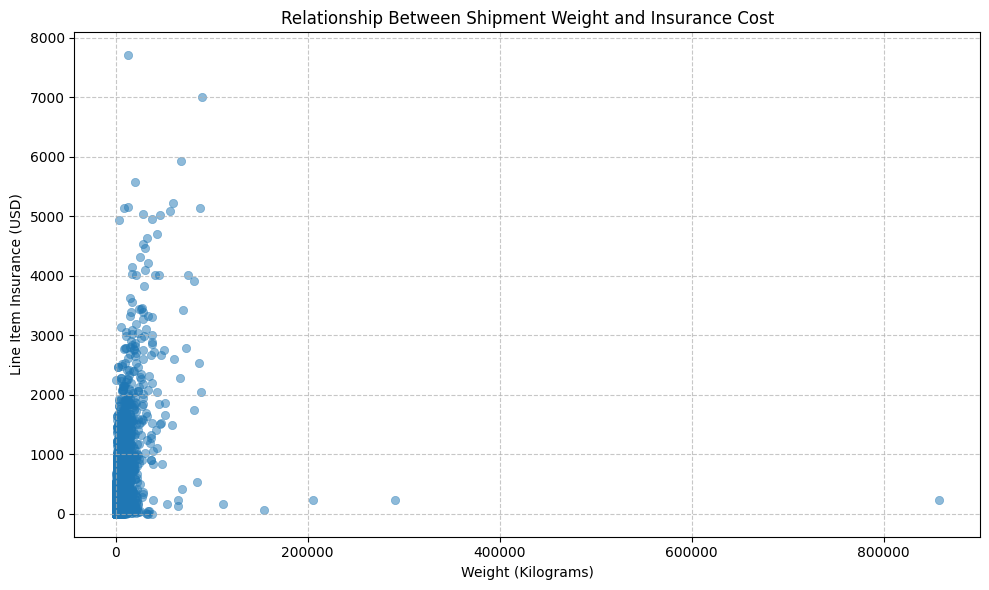

In [41]:
# Scatter plot of Weight vs Line Item Insurance

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_insurance,
    x='Weight (Kilograms)',
    y='Line Item Insurance (USD)',
    alpha=0.5,
    edgecolor=None
)
plt.title('Relationship Between Shipment Weight and Insurance Cost')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Line Item Insurance (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


You can clearly see an upward trend — as weight increases, so does insurance.

The points spread out more at higher weights, suggesting some variability, but the overall pattern supports the correlation result.

### Scatter Plot: Shipment Weight vs Insurance Cost

This scatter plot illustrates the relationship between **shipment weight (in kilograms)** and the **line item insurance cost (in USD)**.

#### Key Insights:
- There appears to be a **general upward trend**, indicating that **heavier shipments typically incur higher insurance costs**.
- However, the spread suggests **considerable variation**, implying that **weight is not the sole factor** determining insurance cost. Factors such as item value, fragility, or shipment destination may also play a role.
- A **dense cluster** is observed for shipments with lower weights and insurance values—suggesting these are the most common.
- Some **high-value outliers** (both in weight and cost) indicate unique or sensitive shipments that may merit further review.

#### Business Implication:
- This relationship supports the use of **weight-based estimation models** for insurance forecasting, but with adjustments for outliers and other influencing variables.
- Further analysis using **regression modeling** could quantify this trend and improve cost predictability.

You may also consider segmenting this data by **shipment mode or product category** to uncover more nuanced patterns.


## **Outliers Detection**

In [42]:
# Selecting numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Detecting outliers using IQR method
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        "num_outliers": outliers.shape[0],
        "percent_outliers": (outliers.shape[0] / df.shape[0]) * 100,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

outlier_summary


{'ID': {'num_outliers': 0,
  'percent_outliers': 0.0,
  'lower_bound': np.float64(-93483.0),
  'upper_bound': np.float64(189927.0)},
 'Unit of Measure (Per Pack)': {'num_outliers': 1023,
  'percent_outliers': 9.908950019372337,
  'lower_bound': np.float64(-60.0),
  'upper_bound': np.float64(180.0)},
 'Line Item Quantity': {'num_outliers': 1371,
  'percent_outliers': 13.279736536226268,
  'lower_bound': np.float64(-24539.625),
  'upper_bound': np.float64(41987.375)},
 'Line Item Value': {'num_outliers': 1127,
  'percent_outliers': 10.916311507167764,
  'lower_bound': np.float64(-238884.22874999998),
  'upper_bound': np.float64(409645.96124999993)},
 'Pack Price': {'num_outliers': 1160,
  'percent_outliers': 11.235955056179774,
  'lower_bound': np.float64(-25.08875),
  'upper_bound': np.float64(52.80125)},
 'Unit Price': {'num_outliers': 880,
  'percent_outliers': 8.523827973653622,
  'lower_bound': np.float64(-0.505),
  'upper_bound': np.float64(1.055)},
 'Line Item Insurance (USD)': {'

In [43]:
# Converting outlier summary dict to a DataFrame
outlier_table = pd.DataFrame.from_dict(outlier_summary, orient='index')

outlier_table = outlier_table.round(2)

# Reseting index to turn column names into a column
outlier_table.reset_index(inplace=True)
outlier_table.rename(columns={"index": "Column Name"}, inplace=True)

outlier_table


,Column Name,num_outliers,percent_outliers,lower_bound,upper_bound
0,ID,0,0.00,-93483.00,189927.00
1,Unit of Measure (Per Pack),1023,9.91,-60.00,180.00
2,Line Item Quantity,1371,13.28,-24539.62,41987.38
3,Line Item Value,1127,10.92,-238884.23,409645.96
4,Pack Price,1160,11.24,-25.09,52.80
5,Unit Price,880,8.52,-0.50,1.06
6,Line Item Insurance (USD),1171,11.34,-345.05,593.83


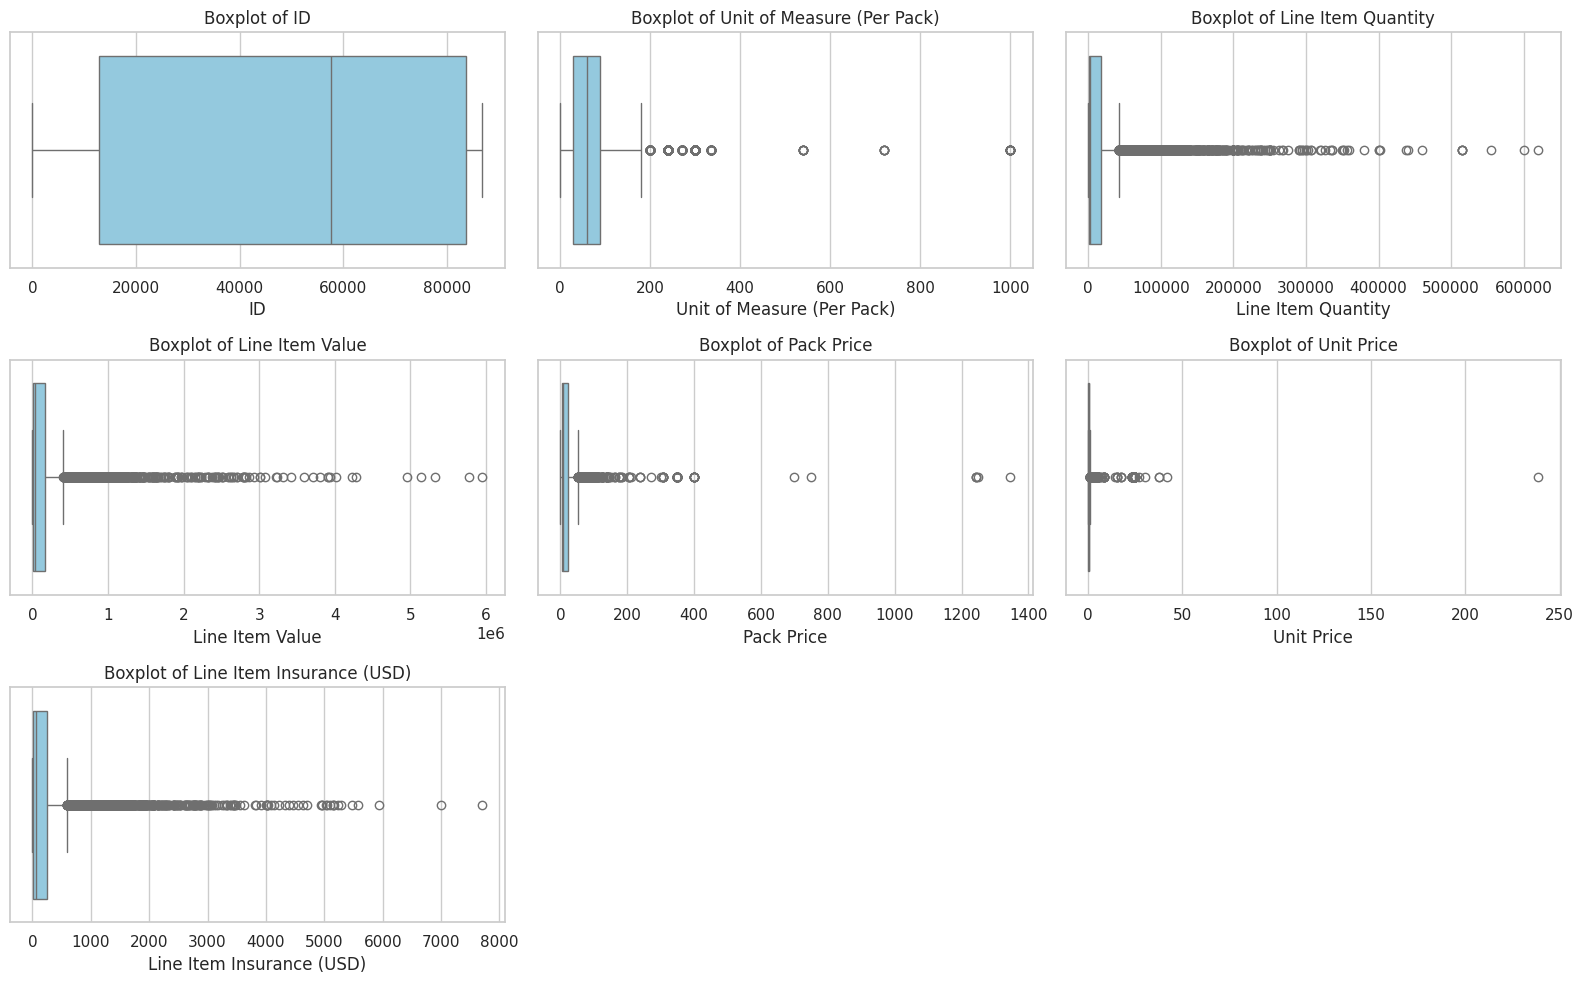

In [44]:
sns.set(style="whitegrid")

# Plot boxplots for all numeric columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


# Key Insights from Numeric Variable Distributions

## Distribution Patterns
- **All variables show strong right-skewed distributions** with most values concentrated at the lower end of their respective ranges and long tails of higher values.
- **Wide value ranges** are observed across all variables, indicating high variability in the supply chain data.
- **Outliers are present in all variables**, suggesting some exceptional transactions that deviate significantly from typical patterns.

## Specific Variable Insights

### ID
- Shows a relatively uniform distribution between lower and upper quartiles, suggesting consistent ID assignment.

### Unit of Measure (Per Pack)
- Most products have small pack sizes (concentrated below 200 units per pack).
- Several outliers exist with much larger packaging formats (600-1000 units).
- The varied pack sizes reflect diverse product types in the supply chain.

### Line Item Quantity
- Orders typically contain smaller quantities, with median values much closer to the lower end.
- Some exceptionally large orders exist (up to ~600,000 units), likely representing bulk procurement events.

### Line Item Value
- Most transactions have relatively modest total values.
- A few high-value outliers significantly skew the distribution, possibly representing specialized or bulk purchases.

### Pack and Unit Prices
- Most products have lower pack and unit prices, reflecting the humanitarian/development context.
- Premium-priced items exist as outliers, likely representing specialized medications or test kits.

### Line Item Insurance (USD)
- Insurance costs predominantly remain low for most shipments.
- Several shipments require substantial insurance coverage (up to ~8,000 USD), correlating with high-value orders.

## Business Implications
- **Inventory management** should account for the wide range of order quantities and product types.
- **Financial planning** needs to consider both the typical lower-value transactions and occasional high-value outliers.
- **Risk management** strategies should address the few shipments requiring substantial insurance coverage.


## **Skewness**

In [45]:
skew_values = df[numeric_cols].skew(numeric_only=True).sort_values(ascending=False)
print(skew_values)

Unit Price                    40.584849
Pack Price                    12.988432
Line Item Value                5.837020
Line Item Quantity             5.038315
Line Item Insurance (USD)      4.895670
Unit of Measure (Per Pack)     4.302502
ID                            -0.230367
dtype: float64


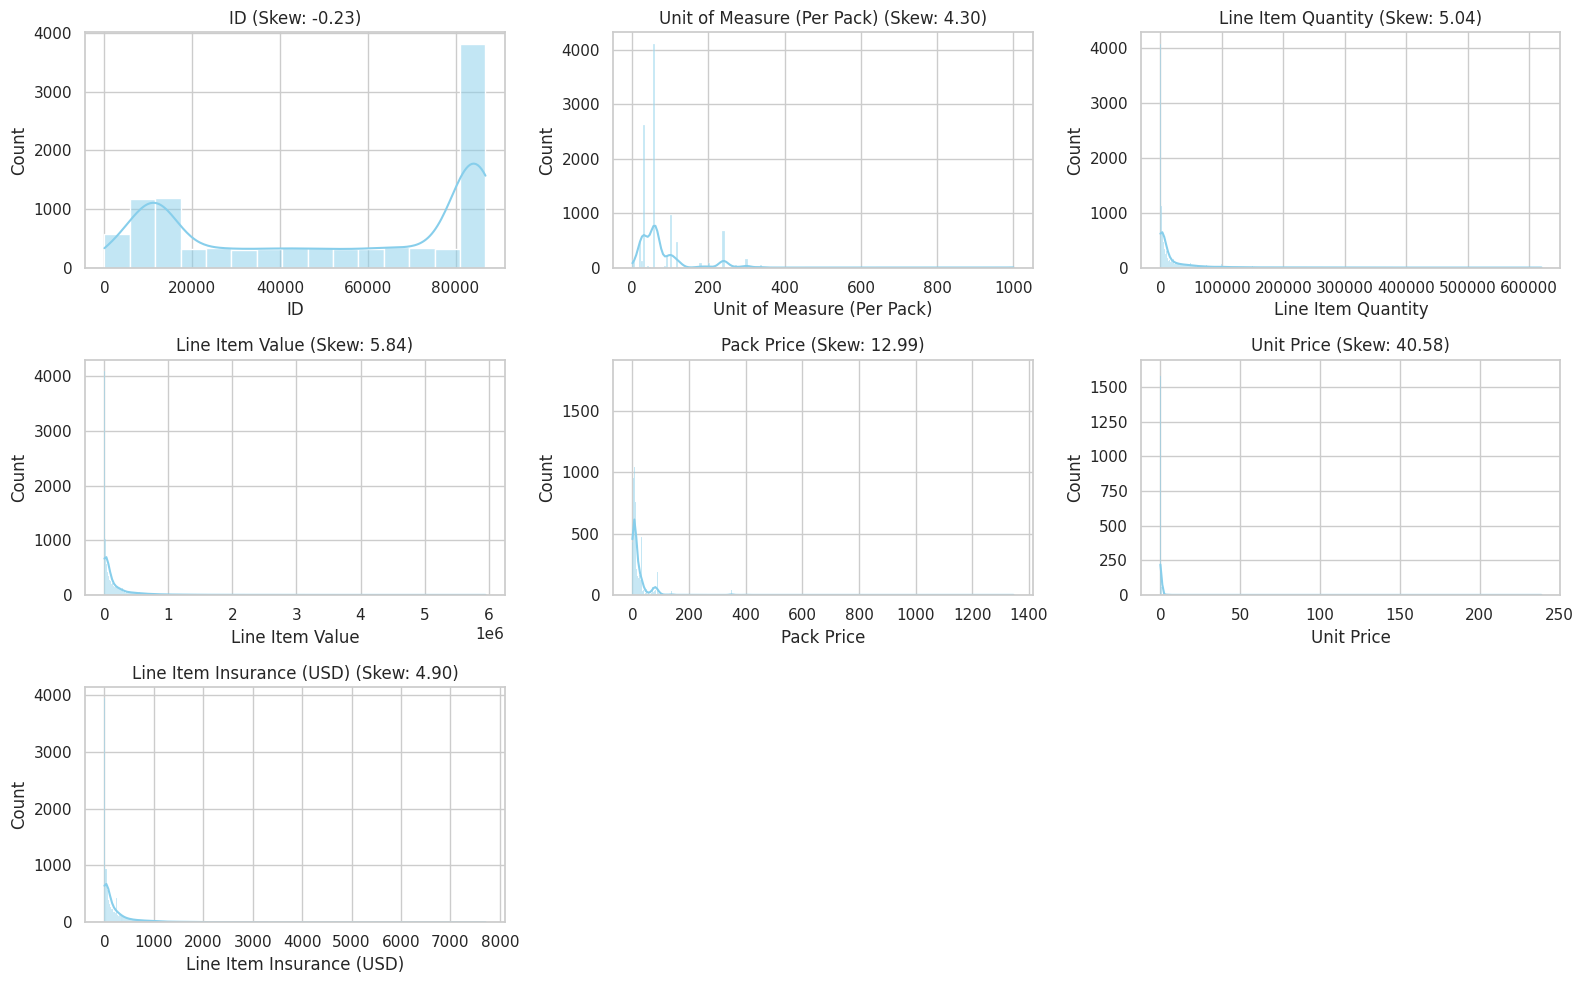

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} (Skew: {df[col].skew():.2f})')
    plt.tight_layout()

plt.show()

### Skewed Distributions and Their Business Relevance

#### Highly Skewed Features Indicate Imbalanced Distributions
Several numerical features (e.g., **Line Item Quantity**, **Line Item Value**, **Pack Price**) exhibit **high positive skew**:
- Most values are **clustered on the lower end**, indicating many small or typical transactions.
- A **long right tail** points to rare, high-value outliers — often bulk orders or special procurements.

#### Distributions Are Not Normal
- Many variables **deviate from a normal distribution**, which can violate assumptions of some statistical models.
- Features with **skewness ≈ 0** (e.g., **Unit Price**, **Unit of Measure**) are more symmetric and typically don't need transformation.

#### Skewness and Business Interpretation
- The presence of **many small-value shipments** alongside a few **high-value bulk shipments** reflects common real-world procurement strategies.
- Helps distinguish between:
  - **Routine replenishments** (low value, high frequency)
  - **Strategic purchases** (high value, low frequency)

#### Implications for Modeling
- Consider **log transformation or normalization** of highly skewed variables for better performance in regression or ML models.
- Outlier detection can also identify **cost anomalies or unusual purchasing patterns**.

This analysis provides a lens into operational scale and helps align statistical techniques with business context.


#  Business Understanding

The dataset is derived from the **Supply Chain Management System (SCMS)**, which oversees the global distribution of health-related products like medicines and medical equipment. Efficient delivery is crucial for maintaining healthcare services, especially in resource-limited settings.

###  Business Challenges:
- Late deliveries can disrupt healthcare operations.
- Inconsistent pricing or shipment delays may reflect inefficiencies.
- Poor planning can lead to surplus, wastage, or stockouts.
- Certain products or suppliers may perform better or worse than others.

---

#  Solution Objective

Used **Exploratory Data Analysis (EDA)** to identify patterns, trends, anomalies, and potential optimization opportunities in the supply chain delivery dataset.

###  Specific Objectives:
- **Delivery Timeliness:** Identify delays across countries, partners, and products.
- **Outliers & Skewness:** Detect unusual pricing, insurance, and quantity values.
- **Correlations:** Discover relationships between shipment cost, mode, insurance, etc.
- **Product Performance:** Determine if specific products (e.g., PMO-US) are associated with delays or inefficiencies.
- **Inventory Optimization:** Use statistical insights to improve forecasting and order accuracy.

---

#  End-Use Application

The insights can help:
- Procurement teams plan smarter purchases.
- Logistics managers streamline shipping methods and vendor selection.
- Donors and policy makers ensure better access to life-saving products.


### Business Impact of this Exploratory Data Analysis (EDA)

My analysis delivers actionable insights across key areas of supply chain management:

---

#### 1. Informed Decision-Making
Stakeholders are empowered to make smarter, data-driven decisions:
- **Shipment Mode Selection**: Air shipments show the highest on-time delivery rates — a justifiable option for high-priority goods despite higher costs.
- **INCO Term Strategy**: Transitioning to terms like **FCA** or **CIP** may improve reliability and reduce operational risk.

---

#### 2. Cost Optimization
The analysis highlights inefficiencies that impact costs:
- **Delay-Related Costs**: Identifying delay hotspots helps reduce penalties, emergency shipping, and stockouts.
- **Insurance Cost Management**: Understanding the relationship between weight and insurance cost enables smarter packaging and vendor term negotiations.

---

#### 3. Supply Chain Reliability
Improved visibility into:
- **Geographic Risks**: Countries like **Congo, DRC** and **Mozambique** show higher delay rates, signaling a need for targeted risk mitigation.
- **Lead Time Optimization**: Balancing lead times to avoid both delays and excessive inventory holding, ensuring smoother cash flow.

---

#### 4. Performance Benchmarking
Clear, measurable KPIs for ongoing improvement:
- **On-Time Delivery Rate** by shipment mode, country, and INCO term.
- **Delay Trends** by vendor or region.
These metrics can be embedded in **vendor scorecards, SLAs**, and internal performance dashboards.

---

#### 5. Operational Improvements
Tactical actions for supply chain teams:
- **Inventory Strategy Refinement** in high-delay regions.
- **Vendor Negotiation Leverage** based on performance data.
- **Targeted Monitoring** for shipments at risk — e.g., by weight, destination, or shipment terms.

---

### Conclusion
This EDA serves as a foundation for continuous improvement in logistics, cost control, and supplier management. With the right data pipeline and reporting framework, these insights can scale into proactive, predictive supply chain intelligence.
